In [193]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [194]:
dataset = pd.read_csv('D14data1.csv')

In [195]:
dataset.shape

(200, 5)

In [196]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [197]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [198]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [199]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [200]:
x = dataset.iloc[:,[3,4]].values

Text(0.5, 1.0, 'DEndogram')

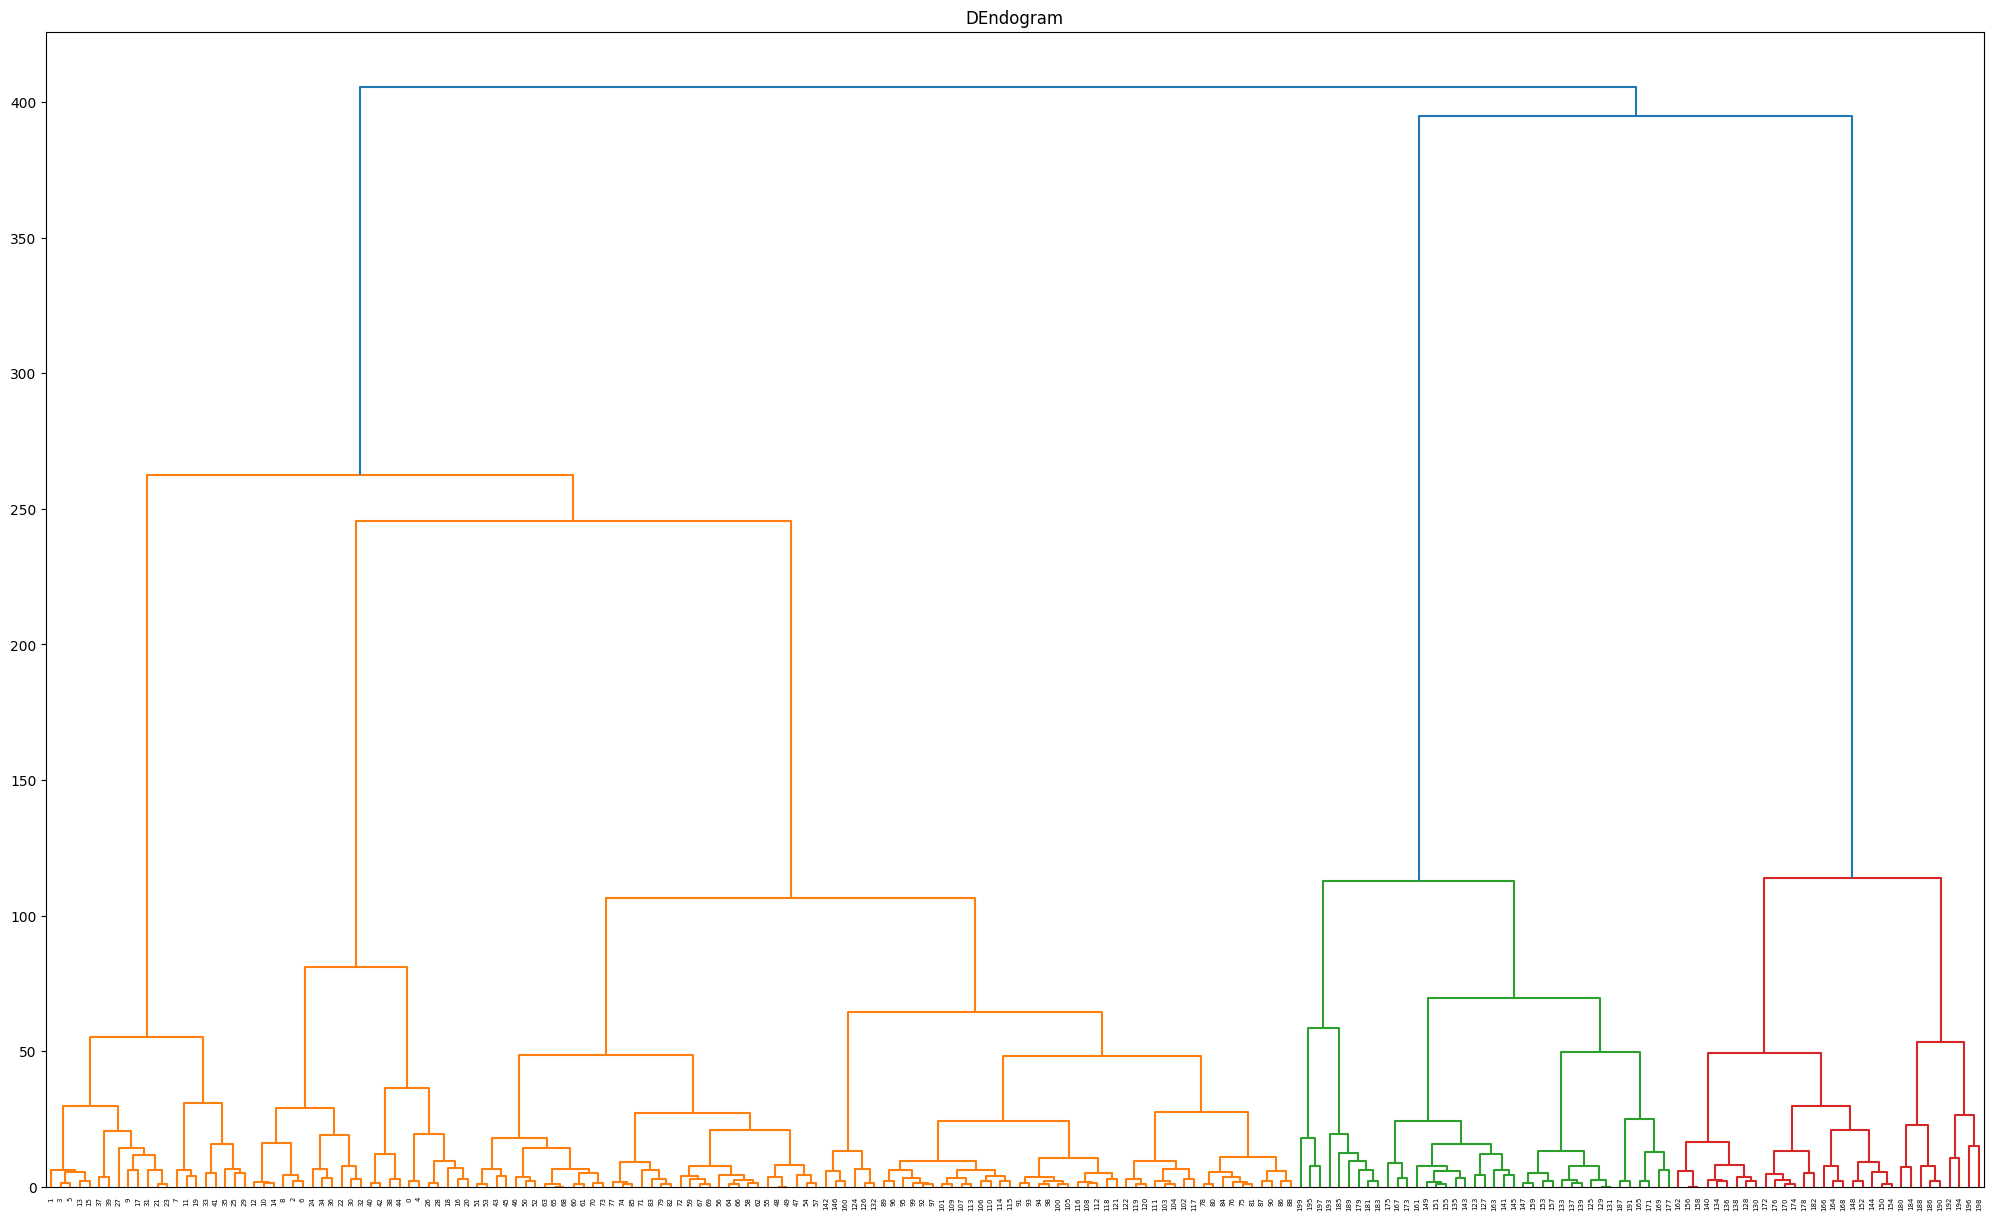

In [201]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,15))
sch.dendrogram(sch.linkage(x,method='ward'))

plt.title('DEndogram')

In [202]:
from sklearn.cluster import AgglomerativeClustering
mol = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [203]:
y_hc = mol.fit_predict(x)

# Visualising the clusters

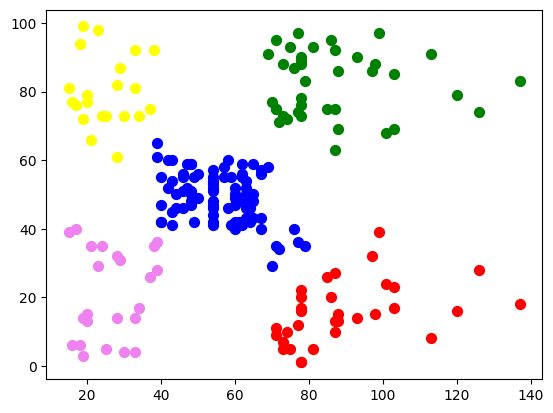

In [204]:
plt.scatter(x[y_hc ==0,0],x[y_hc==0,1],s=50,c='red')
plt.scatter(x[y_hc ==1,0],x[y_hc==1,1],s=50,c='blue')
plt.scatter(x[y_hc ==2,0],x[y_hc==2,1],s=50,c='green')
plt.scatter(x[y_hc ==3,0],x[y_hc==3,1],s=50,c='yellow')
plt.scatter(x[y_hc ==4,0],x[y_hc==4,1],s=50,c='violet')

# K means

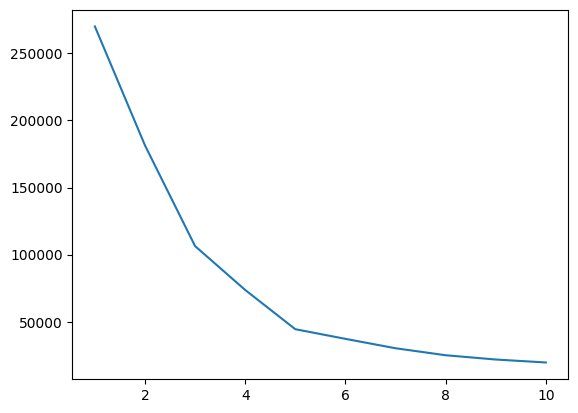

In [205]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
    

# DBScan

In [207]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [228]:
from sklearn.cluster import DBSCAN
mod = DBSCAN(eps=5,min_samples=4,metric='euclidean')
mod.fit(x)

DBSCAN(eps=5, min_samples=4)

In [229]:
y_pred = mod.fit_predict(x)

In [230]:
y_pred

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [231]:
mod.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

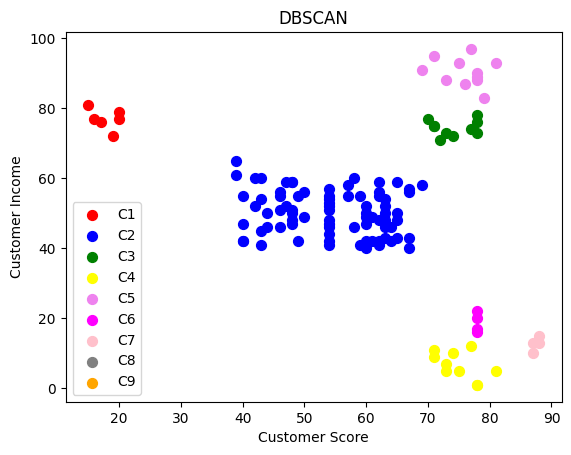

In [232]:
plt.scatter(x[y_pred ==0,0],x[y_pred==0,1],s=50,c='red',label = 'C1')
plt.scatter(x[y_pred ==1,0],x[y_pred==1,1],s=50,c='blue',label = 'C2')
plt.scatter(x[y_pred ==2,0],x[y_pred==2,1],s=50,c='green',label = 'C3')
plt.scatter(x[y_pred ==3,0],x[y_pred==3,1],s=50,c='yellow',label = 'C4')
plt.scatter(x[y_pred ==4,0],x[y_pred==4,1],s=50,c='violet',label = 'C5')
plt.scatter(x[y_pred ==5,0],x[y_pred==5,1],s=50,c='magenta',label = 'C6')
plt.scatter(x[y_pred ==6,0],x[y_pred==6,1],s=50,c='pink',label = 'C7')
plt.scatter(x[y_pred ==7,0],x[y_pred==7,1],s=50,c='gray',label = 'C8')
plt.scatter(x[y_pred ==8,0],x[y_pred==8,1],s=50,c='orange',label = 'C9')
plt.xlabel('Customer Score')
plt.title('DBSCAN')
plt.ylabel('Customer Income')
plt.legend()

In [239]:
df = np.load('D14data2.npy')

In [240]:
df = pd.DataFrame(df)

In [241]:
df

,0,1
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075
...,...,...
2304,-0.063610,0.013804
2305,0.284742,0.301998
2306,0.502431,-0.300296
2307,0.538223,0.194122


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2309 non-null   float64
 1   1       2309 non-null   float64
dtypes: float64(2)
memory usage: 36.2 KB


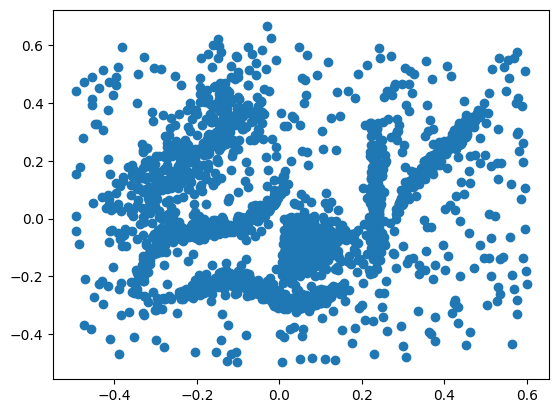

In [353]:

plt.scatter(x=df[0],y=df[1])

In [417]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.03,min_samples=10,metric='euclidean')

In [418]:
dfarr = np.load('D14data2.npy')

In [419]:
dbscan.fit(df)

DBSCAN(eps=0.03, min_samples=10)

In [420]:
dbscan.labels_

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [421]:
pred = dbscan.fit_predict(df)

In [422]:
u = np.unique(pred)

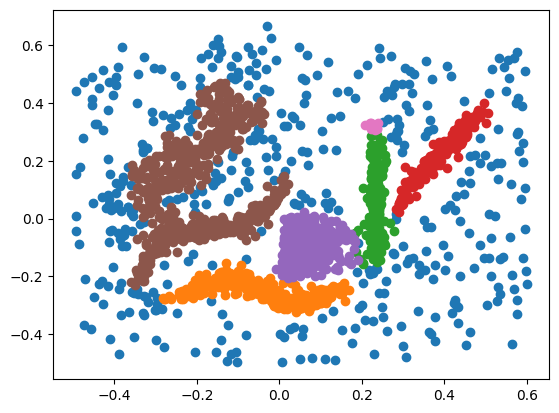

In [423]:
for i in range(len(u)):
    plt.scatter(df.iloc[pred==u[i],0],df.iloc[pred==u[i],1])